<a href="https://colab.research.google.com/github/orilib/PyTorch/blob/main/xray_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data source:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

## Settings

In [3]:
import torch
TRAIN_RUN=True
random_seed = 2021
torch.manual_seed(random_seed);

## Get Data

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
# path where kaggle.json is present in the Google Drive
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/PyTorchPractice"

Mounted at /content/gdrive


In [5]:
!pip install -q kaggle
!kaggle datasets download paultimothymooney/chest-xray-pneumonia -p ./sample_data

100% 2.29G/2.29G [00:50<00:00, 60.8MB/s]
100% 2.29G/2.29G [00:50<00:00, 48.7MB/s]


In [6]:
# !mv chest-xray-pneumonia.zip sample_data/
%cd ./sample_data
!ls

/content/sample_data
anscombe.json		      chest-xray-pneumonia.zip	README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [7]:
!unzip ./chest-xray-pneumonia.zip -d chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0442-

In [8]:
!ls
%cd chest-xray-pneumonia/chest_xray
!ls

anscombe.json		      chest-xray-pneumonia	mnist_train_small.csv
california_housing_test.csv   chest-xray-pneumonia.zip	README.md
california_housing_train.csv  mnist_test.csv
/content/sample_data/chest-xray-pneumonia/chest_xray
chest_xray  __MACOSX  test  train  val


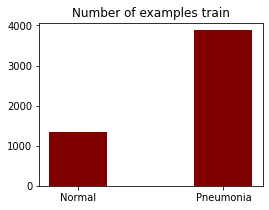

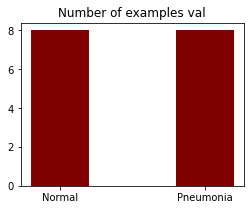

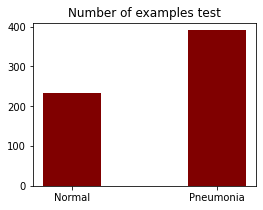

In [9]:
import os
import matplotlib.pyplot as plt

# !ls train/NORMAL/
def get_images(img_path):
    normal_path, pneumonia_path = './'+img_path+'/NORMAL/', './'+img_path+'/PNEUMONIA/'
    normal_images = [normal_path+o.name for o in os.scandir(normal_path) if o.is_file()]
    pneumonia_images = [pneumonia_path+o.name for o in os.scandir(pneumonia_path) if o.is_file()]
    # print(len(normal_images), len(pneumonia_images))   
    fig = plt.figure(figsize = (4, 3))
    # creating the bar plot
    plt.bar(['Normal', 'Pneumonia'], [len(normal_images), len(pneumonia_images)], color ='maroon', width = 0.4)
    plt.title('Number of examples '+img_path)
    plt.show()    
    return normal_images,pneumonia_images

train_images_0,train_images_1 = get_images('train')
train_images = train_images_0 + train_images_1
val_images_0, val_images_1 = get_images('val')
val_images = val_images_0 + val_images_1 
test_images_0, test_images_1 = get_images('test')
test_images = test_images_0 + test_images_1

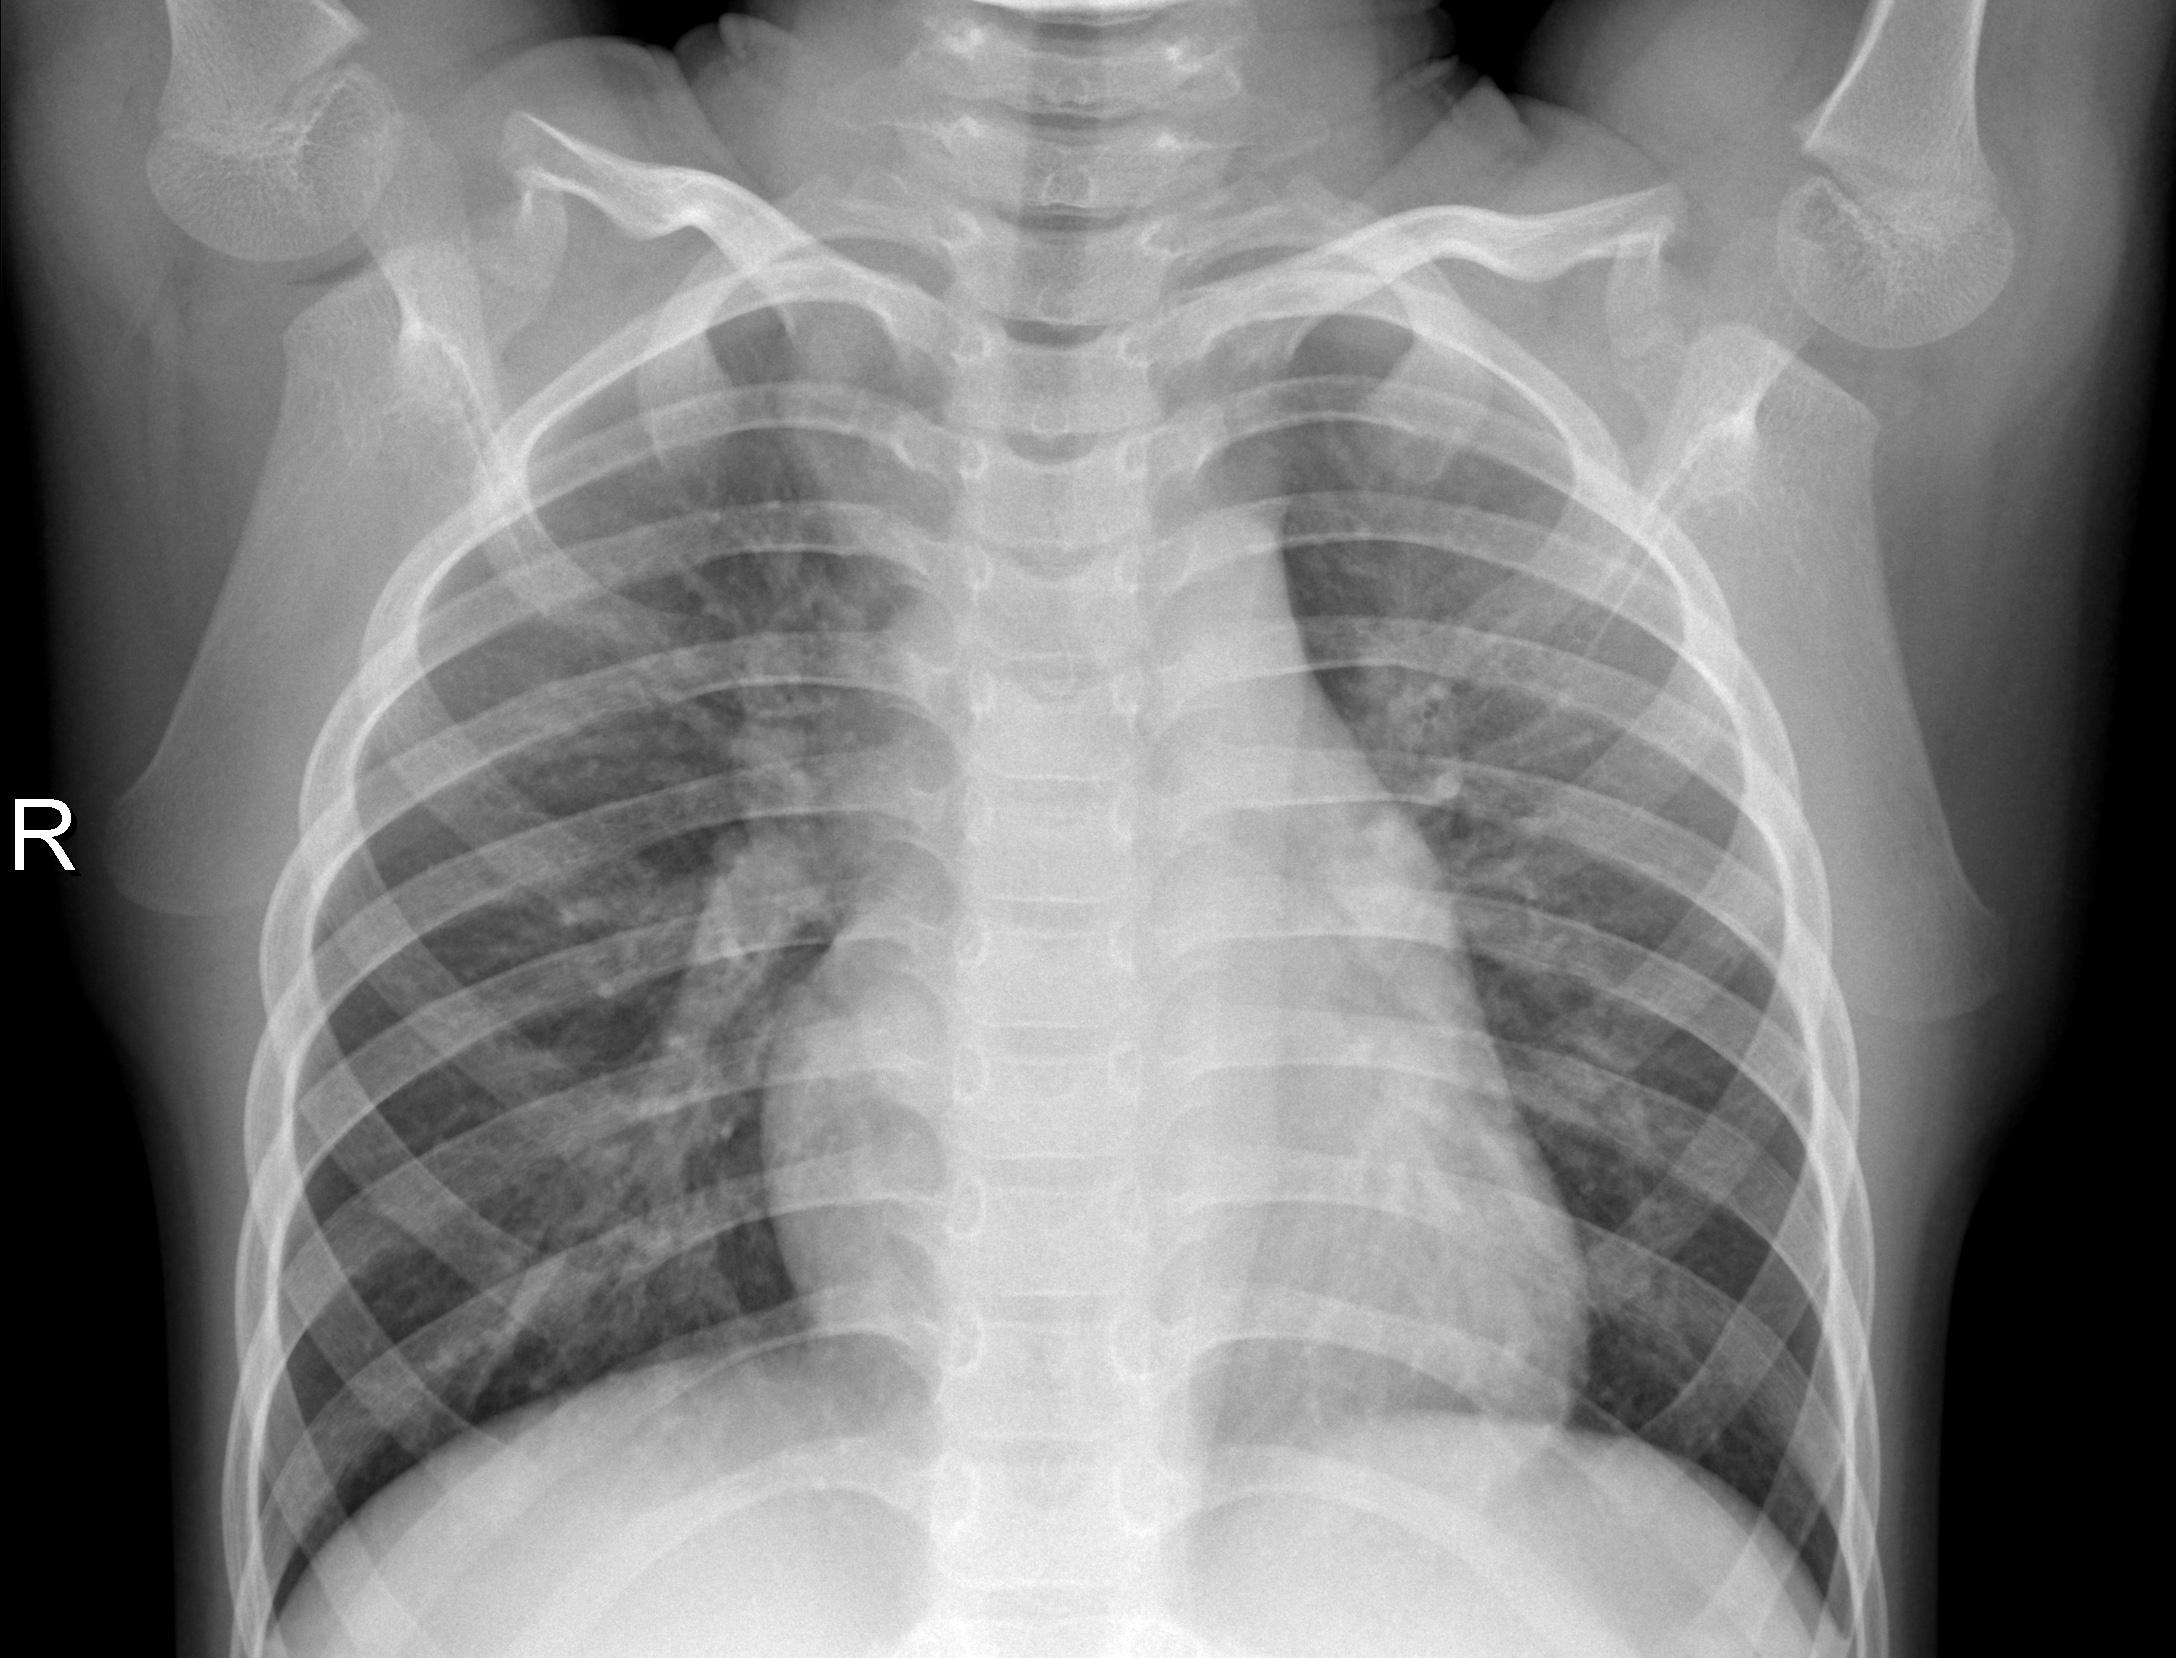

In [10]:
from PIL import Image
# img = Image.open(pneumonia_path+pneumonia_images[0])  
img = Image.open(train_images[0])  
# img.show()
display(img)
# img.size

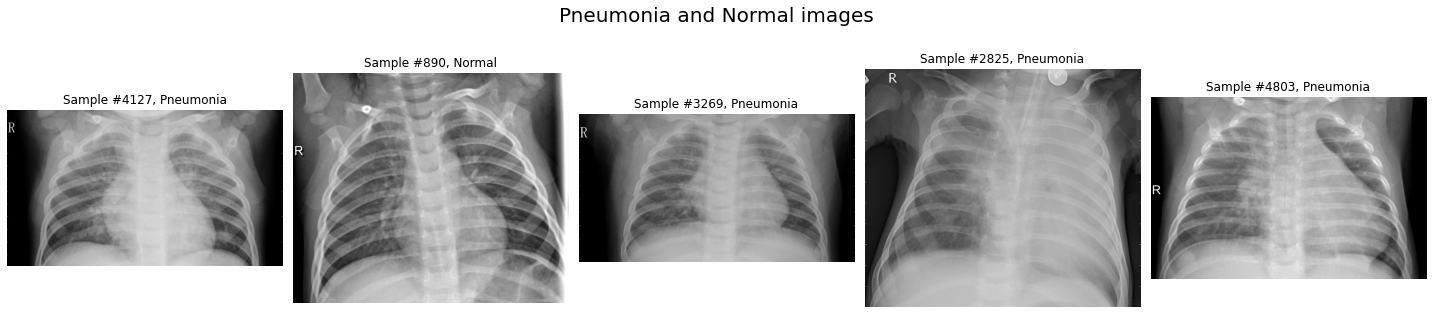

In [11]:
import matplotlib.pyplot as plt
import random
import re
import torch
import numpy as np


def is_Pneumonia(path):
    return re.search("PNEUMONIA", path) != None

def show_images(image_list, number, title=None):
    # fig=plt.figure(figsize=(20, 10))    
    fig = plt.figure(figsize=(min(number,5)*4,5*number/5))
    fig.suptitle(title, fontsize=20)
    for i in range(number):
        img_inx = random.randrange(len(image_list))
        if isinstance(image_list[img_inx], str):
            img = Image.open(image_list[img_inx])
            img = np.asarray(img)
            img_class = 'Pneumonia' if is_Pneumonia(image_list[img_inx]) else 'Normal'
        else: 
            img = image_list[img_inx][0]
            img_class = image_list[img_inx][1]
        ax = fig.add_subplot(number/5, min(number,5), i + 1)
        # ax = plt.subplot(number/5, min(number,5), i + 1)
        
        ax.set_title('Sample #{}, {}'.format(img_inx, img_class))
        plt.axis('off')
        fig.tight_layout()

        if img.ndim == 3 and img.shape[0] > 1:
            if type(img) == torch.Tensor:
                plt.imshow(img.permute(1, 2, 0), )    
            else:
                plt.imshow(img, )    
        else:
            plt.imshow(img.squeeze(), cmap='gray',)         
            # plt.imshow(img, cmap='gray',)
    plt.show()

show_images(train_images, 5, 'Pneumonia and Normal images')

In [12]:
# show_images(normal_images, 5, 'Normal images')

In [13]:
import numpy as np
import re
img = Image.open(train_images[5])  
img.size
imgnp = np.asarray(img)
# imgnp = img.numpy()
# img.
imgnp.min(), imgnp.max()
imgnp.ndim
assert imgnp.ndim==2
# a_path = pneumonia_images[5]
# a_path
# print(re.search("NORMAL", a_path))
# print(re.search("PNEUMONIA", a_path))
# re.search("PNEUMONIA", a_path) != None

In [14]:
from torch.utils.data import Dataset, DataLoader
## Dataset
import re
class xray_Dataset():
    def __init__(self, filelist, transform = None):        
        # super().__init__(self)
        self.filelist = filelist        
        self.transform = transform
    def __len__(self): return int(len(self.filelist))
    def __getitem__(self,index):
        imgpath = self.filelist[index]
        img = Image.open(imgpath)
        if self.transform is not None: img = self.transform(img)        
        img = np.asarray(img).squeeze()
        # print(index, img.ndim, img.shape)    
        if img.ndim==2 and img.shape[0] != 3:
            # assert img.ndim==2  
            img = np.stack((img,img,img),axis=0)       
        img = torch.Tensor(img)
        label = int(re.search("PNEUMONIA", imgpath) != None)
        
        return (img,label)

In [15]:
def show_batch_images(image_list, number, title=None):    
    fig = plt.figure(figsize=(min(number,5)*4,5*number/5))
    fig.suptitle(title, fontsize=20)
    for i in range(number):        
        # print(image_list[img_inx])
        if len(image_list[0])==2: # dataset
            img_inx = random.randrange(len(image_list))
            img, img_class = image_list[img_inx][0], image_list[img_inx][1]
        else: # dataloader
            img_inx = random.randrange(len(image_list[0]))
            img, img_class = image_list[0][img_inx], image_list[1][img_inx]
        ax = fig.add_subplot(number/5, min(number,5), i + 1)                
        ax.set_title('Sample #{}, {}'.format(img_inx, img_class))
        plt.axis('off')
        fig.tight_layout()
        # if img.ndim == 3 and img.shape[0] > 1:
        if type(img) == torch.Tensor:
            plt.imshow(img.permute(1, 2, 0), )    
        else:
            print(img_inx,img)
            # plt.imshow(img, )    
        
        # else:
            # plt.imshow(img.squeeze(), cmap='gray',)         
            # plt.imshow(img, cmap='gray',)
    plt.show()

In [16]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
## Transforms
# resize to 224x224?
basic_data_transform = transforms.Compose([
    transforms.Resize(256),
    # transforms.ColorJitter(),
    transforms.RandomCrop(224),
    #transforms.RandomHorizontalFlip(),
    # transforms.Resize(128),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    # transforms.ColorJitter(),
    # transforms.RandomCrop(224),
    #transforms.RandomHorizontalFlip(),
    # transforms.Resize(128),
    transforms.ToTensor()
])


In [17]:
train_images[:5]

['./train/NORMAL/NORMAL2-IM-1328-0001.jpeg',
 './train/NORMAL/IM-0641-0001.jpeg',
 './train/NORMAL/IM-0652-0001-0002.jpeg',
 './train/NORMAL/IM-0411-0001.jpeg',
 './train/NORMAL/IM-0304-0001.jpeg']

In [18]:
# train_ds = Dataset(train_images)
# split 80/20
split_vals = [int(0.8*len(train_images)), len(train_images) - int(0.8*len(train_images))]
train_set,val_set = torch.utils.data.random_split(train_images, split_vals)
train_ds = xray_Dataset(train_set, basic_data_transform)
val_ds = xray_Dataset(val_set, test_data_transform)
# val_ds = xray_Dataset(val_images, basic_data_transform)
test_ds = xray_Dataset(test_images, test_data_transform)

## Dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

In [19]:
print(len(train_ds), len(val_ds))

4172 1044


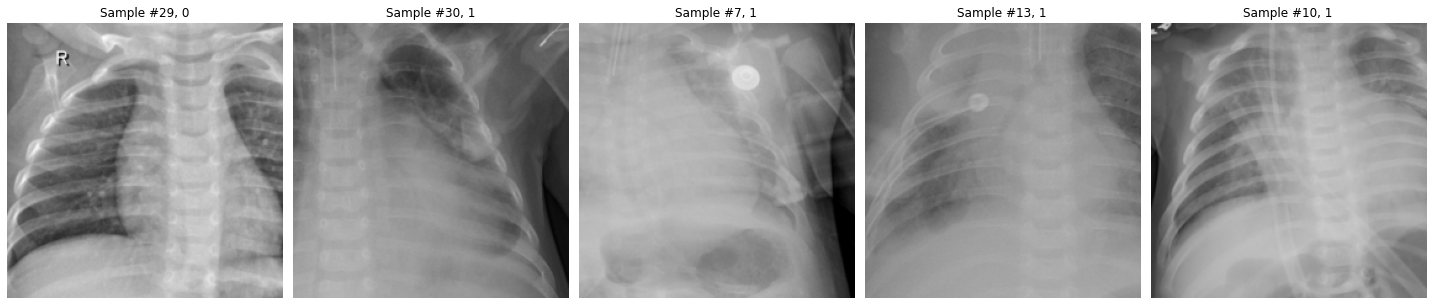

In [20]:
# temp = iter(train_dl).next()
temp = iter(test_dl).next()

# temp[1][2]
# len(temp[0])
show_batch_images(iter(train_dl).next(), 5, title=None)



## Create Model


In [21]:
import torchvision.models as models
import torch.nn as nn
resnet_model = models.resnet18(pretrained = True)

# add clasifier for 30 outputs
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 2)
# model2.fc = nn.Sequential(
#         nn.Linear(num_ftrs, 30),
#         torch.reshape((-1,15,2))
# )

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


## Define Fit

In [22]:

model = resnet_model
lr=0.001
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


In [23]:
def fit(dataloader_train, dataloader_val, epochs=3):
    itr = 0; itr_val = 0
    p_itr = 20
    # model.train()
    total_loss = 0
    loss_list, val_loss_list = [], []
    acc_list, val_acc_list = [], []
    for epoch in range(epochs):
        total_loss = 0
        model.train()
        for samples, labels in dataloader_train: # run over the mini batches
            # get the inputs; data is a list of [inputs, labels]
            samples, labels = samples.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            output = model(samples)
            loss = criterion(output, labels.long())
            loss.backward()
            optimizer.step()        
            # scheduler.step()        
            # print statistics every p_itr iterations
            total_loss += loss.item()
            itr += 1
            if itr % p_itr == 0:
                pred = torch.argmax(output, dim=1)
                # print(f'predictions: {pred}')
                correct = pred.eq(labels)
                # print(f'labels: {labels}')
                # print(f'correct: {correct}')
                acc = torch.mean(correct.float())
                # print(f'accyracy: {acc}')
                print('[Epoch {}/{}] Iteration {} -> Train Loss: {:.4f}, Accuracy: {:.3f}'\
                        .format(epoch+1, epochs, itr, total_loss/p_itr, acc))
                loss_list.append(total_loss/p_itr)
                acc_list.append(acc)
                total_loss = 0
                # break                   

        # Run a validation loop at the end of each epoch
        total_loss = 0; acc=0
        model.eval()
        for samples, labels in dataloader_val:
            samples, labels = samples.to(device), labels.to(device)            
            output = model(samples)
            loss = criterion(output, labels.long())            
            total_loss += loss.item()
            itr_val += 1
            # if itr_val % p_itr == 0:
            pred = torch.argmax(output, dim=1)
            # print(f'predictions: {pred}')
            correct = pred.eq(labels)
            # print(f'labels: {labels}')
            # print(f'correct: {correct}')
            acc += torch.mean(correct.float())
            # print(f'accuracy: {acc}')
        acc /= len(dataloader_val)      
        total_loss /= len(dataloader_val)
        print('[Epoch {}/{}] -> Val Loss: {:.4f}, Accuracy: {:.3f}'\
        .format(epoch+1, epochs, total_loss/len(dataloader_val), acc))
        val_loss_list.append(total_loss)
        val_acc_list.append(acc)        

            
    print('Finished Training')

    plt.plot(loss_list, label='loss')
    plt.plot(acc_list, label='accuracy')
    plt.legend()
    plt.title('training loss and accuracy')
    plt.show()

    plt.plot(val_loss_list, label='loss')
    plt.plot(val_acc_list, label='accuracy')
    plt.legend()
    plt.title('validation loss and accuracy')
    plt.show()


## Train

[Epoch 1/5] Iteration 20 -> Train Loss: 0.0680, Accuracy: 1.000
[Epoch 1/5] Iteration 40 -> Train Loss: 0.1130, Accuracy: 1.000
[Epoch 1/5] Iteration 60 -> Train Loss: 0.0703, Accuracy: 0.969
[Epoch 1/5] Iteration 80 -> Train Loss: 0.0660, Accuracy: 0.938
[Epoch 1/5] Iteration 100 -> Train Loss: 0.0568, Accuracy: 1.000
[Epoch 1/5] Iteration 120 -> Train Loss: 0.1129, Accuracy: 1.000
[Epoch 1/5] Iteration 140 -> Train Loss: 0.0755, Accuracy: 0.969
[Epoch 1/5] Iteration 160 -> Train Loss: 0.1174, Accuracy: 0.969
[Epoch 1/5] -> Val Loss: 0.4922, Accuracy: 0.750
[Epoch 2/5] Iteration 180 -> Train Loss: 0.0614, Accuracy: 1.000
[Epoch 2/5] Iteration 200 -> Train Loss: 0.0456, Accuracy: 0.969
[Epoch 2/5] Iteration 220 -> Train Loss: 0.0962, Accuracy: 0.969
[Epoch 2/5] Iteration 240 -> Train Loss: 0.1021, Accuracy: 0.969
[Epoch 2/5] Iteration 260 -> Train Loss: 0.0637, Accuracy: 1.000
[Epoch 2/5] Iteration 280 -> Train Loss: 0.0562, Accuracy: 0.969
[Epoch 2/5] Iteration 300 -> Train Loss: 0.04

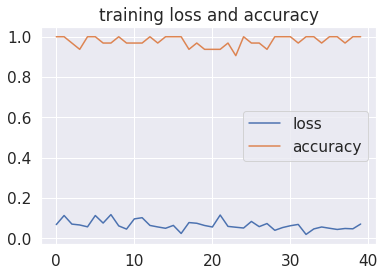

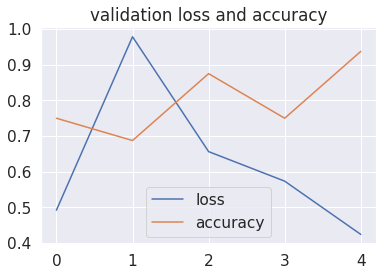

In [34]:
if TRAIN_RUN:
    fit(train_dl, val_dl, epochs=5)

## Test Functions

In [35]:
def test_model(model, test_dl):
    expected=[]; predicted=[]
    model.eval()
    for samples, labels in test_dl:
        samples, labels = samples.to(device), labels.to(device)            
        output = model(samples)
        # loss = criterion(output, labels.long())                
        pred = torch.argmax(output, dim=1)
        expected.extend(labels.tolist())
        predicted.extend(pred.tolist())
    return expected, predicted

In [36]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
def calc_confusion_matrix(expected, predicted):
    results = confusion_matrix(expected, predicted)
    print(results)

    tn, fp, fn, tp = results.ravel() #confusion_matrix(expected, predicted).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*((precision*recall)/(precision+recall))    
    print(f"Pneumonia: precision={precision:.4}  recall={recall:.4}  f1: {f1:.4f}")        
    precision = tn/(tn+fn)
    recall = tn/(tn+fp)    
    f1 = 2*((precision*recall)/(precision+recall))    
    print(f"Normal: precision={precision:.4}  recall={recall:.4}  f1: {f1:.4f}")
    accuracy = (tn+tp)/(tn+ fp+ fn+ tp)
    print(f"Accuracy: {accuracy*100:.2f}%")
    return results

In [37]:
import seaborn as sn
import pandas as pd
def show_confusion_matrix(results):
    df_cm = pd.DataFrame(results, columns = ['Normal', 'Pneumonia'])
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.0f',  xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia']) # font size
    # sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.0f') # font size
    plt.show()

## Test

In [38]:
# ""
SAVED_MODEL_PATH = '/content/gdrive/MyDrive/Colab Notebooks/PyTorchPractice/xray_pneumonia.pth'
def save_model(model):
    torch.save(model, SAVED_MODEL_PATH)
def load_model(model):
    model.load_state_dict(torch.load(SAVED_MODEL_PATH))  

if TRAIN_RUN:    
    save_model(model)
    # torch.save(model, SAVED_MODEL_PATH)
    # torch.save(model.state_dict(), SAVED_MODEL_PATH)
else:    
    # model = NeuralNetwork()
    load_model(model)
    # model.load_state_dict(torch.load(SAVED_MODEL_PATH))  
    # model = torch.load(SAVED_MODEL_PATH)

_ = model.eval()  

In [39]:
expected, predicted = test_model(model, test_dl)

In [40]:
results = calc_confusion_matrix(expected, predicted)

[[206  28]
 [ 13 377]]
Pneumonia: precision=0.9309  recall=0.9667  f1: 0.9484
Normal: precision=0.9406  recall=0.8803  f1: 0.9095
Accuracy: 93.43%


As expected, the minority class - the 'Normal', has worse recall 

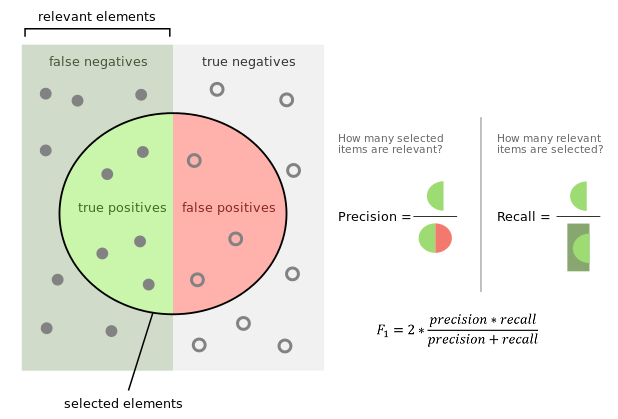


* [[208  26]
 [ 10 380]]
* Pneumonia: precision=0.936  recall=0.9744  f1: 0.9548
* Normal: precision=0.9541  recall=0.8889  f1: 0.9204
* Accuracy: 94.23%

[1, 1]:
*   [[165  69]
 [  6 384]]
*   Pneumonia: precision=0.8477 recall=0.9846
*   Normal: precision=0.9649 recall=0.7051
*   Accuracy: 87.98%



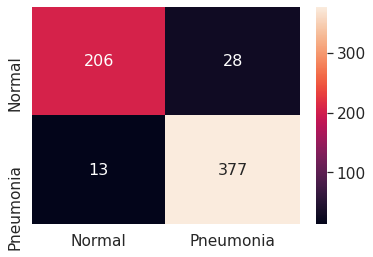

In [41]:
show_confusion_matrix(results)

In [42]:
# from sklearn.metrics import plot_confusion_matrix
# disp = plot_confusion_matrix(model, X_test, y_test,
#                             display_labels=class_names,
#                             cmap=plt.cm.Blues,
#                             normalize=normalize)
# disp.ax_.set_title(title)

# print(title)
# print(disp.confusion_matrix)

## Retry

#### Add Data augmenatation


In [122]:
from torchvision import transforms
data_transform = transforms.Compose([        
    transforms.Resize(size=(256,256)),        
    transforms.ColorJitter(brightness=0.2, contrast=0, saturation=0, hue=0),
    transforms.RandomRotation(degrees=10), #expand=True        
    transforms.RandomAffine(translate=(0.05,0.05), degrees=0),
    transforms.GaussianBlur(3),    
    transforms.RandomCrop(224),    
    #transforms.RandomHorizontalFlip(),
    # transforms.Resize(128),
    transforms.ToTensor()
])

**Common bug** - random flip is not a good tranformation since the chest is not symmetrical



In [123]:
# train_ds = xray_Dataset(train_images, data_transform)
train_ds = xray_Dataset(train_set, data_transform)
val_ds = xray_Dataset(val_set, test_data_transform)
test_ds = xray_Dataset(test_images, test_data_transform)

## Dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

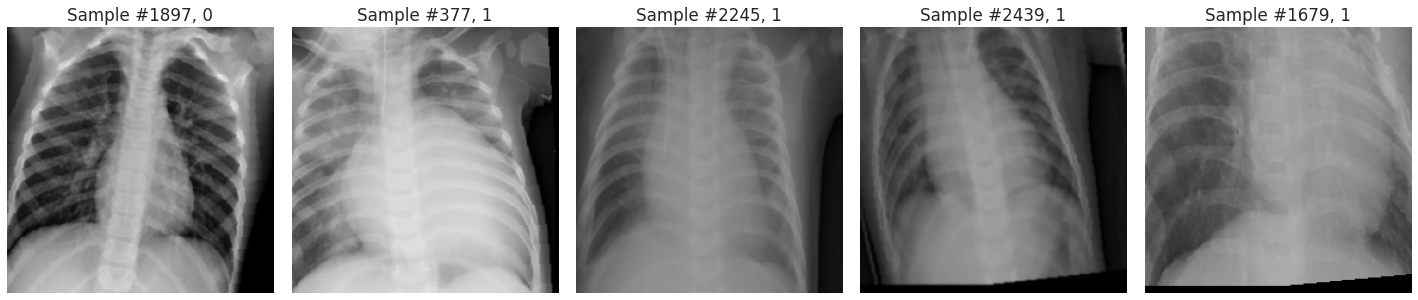

In [124]:
test_ds[0][0]
# show_images(train_images[:2], 5)
# type(train_ds[0][0])
show_batch_images(train_ds, 5)
# plt.imshow(train_images[0][0])
# train_ds[0][0]

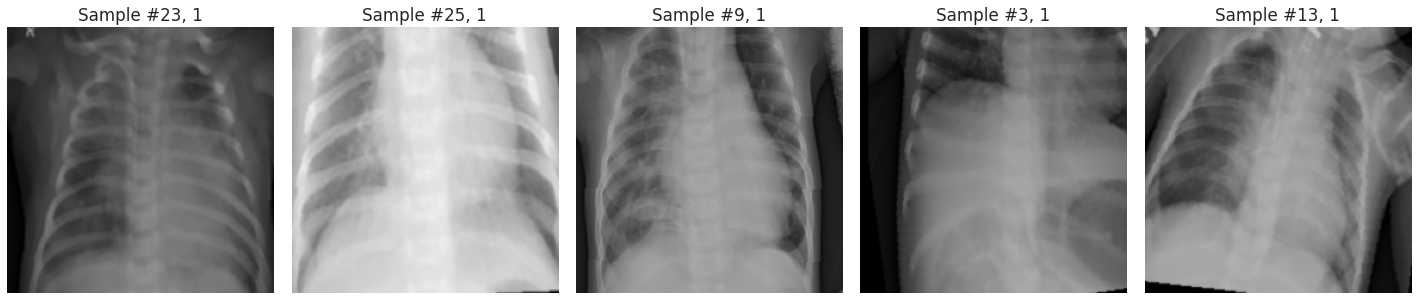

In [125]:
# temp = iter(train_dl).next()
# temp[1][2]
# len(temp[0])
show_batch_images(iter(train_dl).next(), 5, title=None)

In [126]:
model = resnet_model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

[Epoch 1/5] Iteration 20 -> Train Loss: 0.0233, Accuracy: 1.000
[Epoch 1/5] Iteration 40 -> Train Loss: 0.0128, Accuracy: 1.000
[Epoch 1/5] Iteration 60 -> Train Loss: 0.0187, Accuracy: 1.000
[Epoch 1/5] Iteration 80 -> Train Loss: 0.0181, Accuracy: 1.000
[Epoch 1/5] Iteration 100 -> Train Loss: 0.0328, Accuracy: 0.969
[Epoch 1/5] Iteration 120 -> Train Loss: 0.0289, Accuracy: 1.000
[Epoch 1/5] -> Val Loss: 0.0029, Accuracy: 0.947
[Epoch 2/5] Iteration 140 -> Train Loss: 0.0176, Accuracy: 1.000
[Epoch 2/5] Iteration 160 -> Train Loss: 0.0208, Accuracy: 1.000
[Epoch 2/5] Iteration 180 -> Train Loss: 0.0312, Accuracy: 1.000
[Epoch 2/5] Iteration 200 -> Train Loss: 0.0245, Accuracy: 1.000
[Epoch 2/5] Iteration 220 -> Train Loss: 0.0247, Accuracy: 1.000
[Epoch 2/5] Iteration 240 -> Train Loss: 0.0169, Accuracy: 1.000
[Epoch 2/5] Iteration 260 -> Train Loss: 0.0586, Accuracy: 0.969
[Epoch 2/5] -> Val Loss: 0.0017, Accuracy: 0.965
[Epoch 3/5] Iteration 280 -> Train Loss: 0.0133, Accuracy: 1.

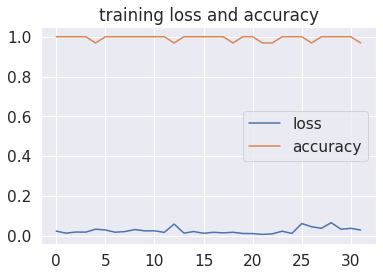

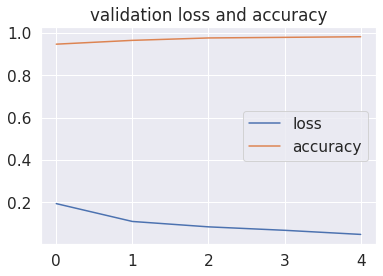

In [127]:
fit(train_dl, val_dl, epochs=5)

[[166  68]
 [  2 388]]
Pneumonia: precision=0.8509  recall=0.9949  f1: 0.9173
Normal: precision=0.9881  recall=0.7094  f1: 0.8259
Accuracy: 88.78%


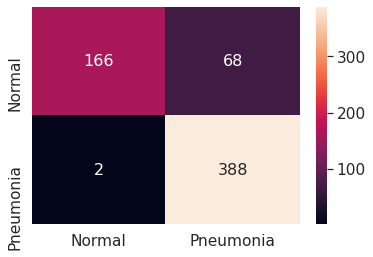

In [128]:
expected, predicted = test_model(model, test_dl)
results = calc_confusion_matrix(expected, predicted)
show_confusion_matrix(results)

We can see that the 'Normal' category has worse results then the Pneumonia results, due to the imbalanced training data.

### Set Class weights
weights are oposite to the distribution to balance back the loss with the imbalanced data

In [129]:
# train_ds = xray_Dataset(train_images, basic_data_transform)
# val_ds = xray_Dataset(val_images, basic_data_transform)
train_ds = xray_Dataset(train_set, basic_data_transform)
val_ds = xray_Dataset(val_set, test_data_transform)
test_ds = xray_Dataset(test_images, test_data_transform)

## Dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

In [130]:
train_normal_count, train_pnoeumania_count = (len(train_images_0),len(train_images_1))
print(train_normal_count, train_pnoeumania_count)
sum_train = train_normal_count + train_pnoeumania_count
weight_for_Normal = (1 / train_normal_count) * (sum_train / 2.0)
weight_for_Pnoeumania = (1 / train_pnoeumania_count) * (sum_train / 2.0)
weight = torch.Tensor([weight_for_Normal, weight_for_Pnoeumania])
print(f'Weights: {weight}')

1341 3875
Weights: tensor([1.9448, 0.6730])


In [131]:
model = resnet_model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
weight = weight.to(device)
criterion = nn.CrossEntropyLoss(weight=weight)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

[Epoch 1/5] Iteration 20 -> Train Loss: 0.0564, Accuracy: 0.969
[Epoch 1/5] Iteration 40 -> Train Loss: 0.0408, Accuracy: 0.969
[Epoch 1/5] Iteration 60 -> Train Loss: 0.0438, Accuracy: 1.000
[Epoch 1/5] Iteration 80 -> Train Loss: 0.0576, Accuracy: 0.938
[Epoch 1/5] Iteration 100 -> Train Loss: 0.0554, Accuracy: 0.969
[Epoch 1/5] Iteration 120 -> Train Loss: 0.0358, Accuracy: 0.969
[Epoch 1/5] -> Val Loss: 0.0014, Accuracy: 0.963
[Epoch 2/5] Iteration 140 -> Train Loss: 0.0139, Accuracy: 1.000
[Epoch 2/5] Iteration 160 -> Train Loss: 0.0203, Accuracy: 1.000
[Epoch 2/5] Iteration 180 -> Train Loss: 0.0352, Accuracy: 0.969
[Epoch 2/5] Iteration 200 -> Train Loss: 0.0207, Accuracy: 0.969
[Epoch 2/5] Iteration 220 -> Train Loss: 0.0340, Accuracy: 1.000
[Epoch 2/5] Iteration 240 -> Train Loss: 0.0319, Accuracy: 0.969
[Epoch 2/5] Iteration 260 -> Train Loss: 0.0142, Accuracy: 1.000
[Epoch 2/5] -> Val Loss: 0.0016, Accuracy: 0.977
[Epoch 3/5] Iteration 280 -> Train Loss: 0.0226, Accuracy: 0.

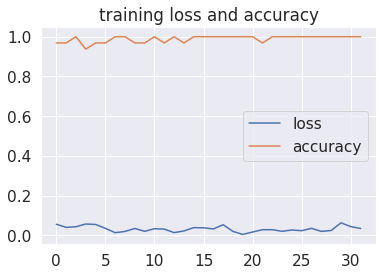

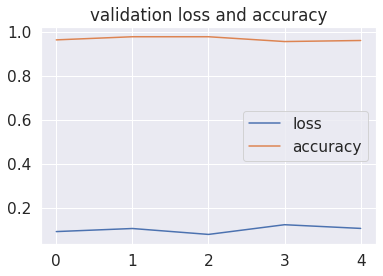

In [132]:
fit(train_dl, val_dl, epochs=5)

[[210  24]
 [  9 381]]
Pneumonia: precision=0.9407  recall=0.9769  f1: 0.9585
Normal: precision=0.9589  recall=0.8974  f1: 0.9272
Accuracy: 94.71%


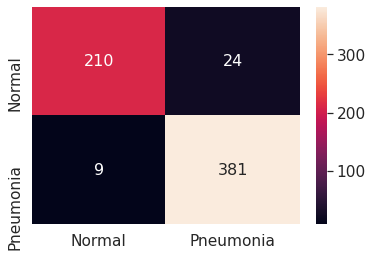

In [133]:
expected, predicted = test_model(model, test_dl)
results = calc_confusion_matrix(expected, predicted)
show_confusion_matrix(results)

[1.9448, 0.6730]:
* [[210  24]
 [ 23 367]]
* Pneumonia: precision=0.9386  recall=0.941
* f1: 0.9398
* Normal: precision=0.9013  recall=0.8974
* Accuracy: 92.47%

[1.9448, 0.6730]:
* [[189  45]
 [  8 382]]
* Pneumonia: precision=0.8946  recall=0.9795
* f1: 0.9351
* Normal: precision=0.9594  recall=0.8077
* Accuracy: 91.51%

[0.75, 0.25]:
* [[136  98]
 [  2 388]]
* Pneumonia: precision=0.7984 recall=0.9949
* f1: 0.885
* Normal: precision=0.98 recall=0.56
* Accuracy: 83%

#### show incorrect results

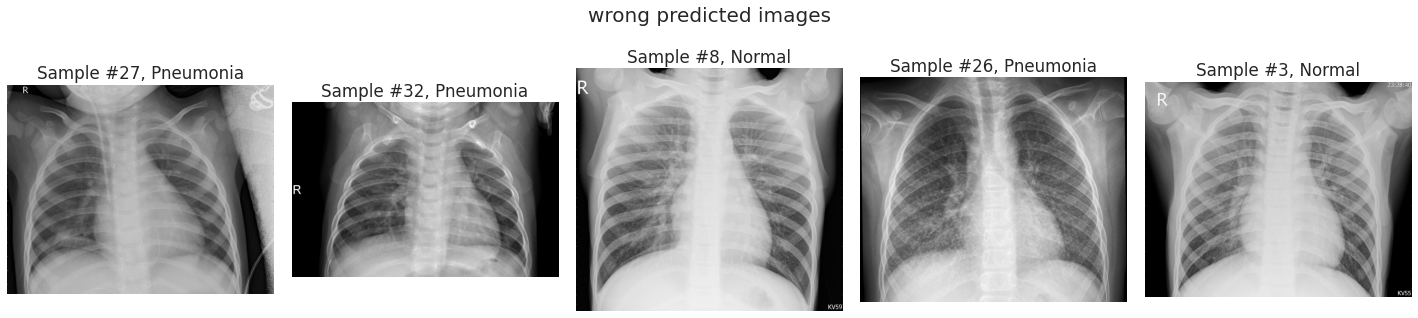

In [134]:
bad_predictions = (np.array(expected) != np.array(predicted))
indexes = np.where(bad_predictions)[0]
wrong_test_samples = [test_images[inx] for inx in indexes]
show_images(wrong_test_samples, 5, 'wrong predicted images')

### Try to Weight extremly towards Normal





In [25]:
train_ds = xray_Dataset(train_images, basic_data_transform)
val_ds = xray_Dataset(val_images, test_data_transform)
test_ds = xray_Dataset(test_images, test_data_transform)

## Dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

In [26]:
train_normal_count, train_pnoeumania_count = (len(train_images_0),len(train_images_1))
sum_train = train_normal_count + train_pnoeumania_count

# weight = torch.Tensor([train_pnoeumania_count/sum_train, train_normal_count/sum_train])
# weight = torch.Tensor([4, 0.001])
weight = torch.Tensor([1, 1])
# weight = torch.Tensor([0.001, 4])
print(f'Weights: {weight}')



Weights: tensor([1., 1.])


In [29]:
model = resnet_model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
weight = weight.to(device)
# criterion = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss(weight=weight)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

[Epoch 1/5] Iteration 20 -> Train Loss: 0.2850, Accuracy: 0.875
[Epoch 1/5] Iteration 40 -> Train Loss: 0.2188, Accuracy: 0.938
[Epoch 1/5] Iteration 60 -> Train Loss: 0.1567, Accuracy: 0.969
[Epoch 1/5] Iteration 80 -> Train Loss: 0.1162, Accuracy: 0.969
[Epoch 1/5] Iteration 100 -> Train Loss: 0.0849, Accuracy: 0.969
[Epoch 1/5] Iteration 120 -> Train Loss: 0.1342, Accuracy: 0.906
[Epoch 1/5] Iteration 140 -> Train Loss: 0.0891, Accuracy: 0.969
[Epoch 1/5] Iteration 160 -> Train Loss: 0.1052, Accuracy: 1.000
[Epoch 1/5] -> Val Loss: 2.2458, Accuracy: 0.500
[Epoch 2/5] Iteration 180 -> Train Loss: 0.1119, Accuracy: 0.906
[Epoch 2/5] Iteration 200 -> Train Loss: 0.1277, Accuracy: 1.000
[Epoch 2/5] Iteration 220 -> Train Loss: 0.0802, Accuracy: 1.000
[Epoch 2/5] Iteration 240 -> Train Loss: 0.1374, Accuracy: 0.969
[Epoch 2/5] Iteration 260 -> Train Loss: 0.1010, Accuracy: 0.938
[Epoch 2/5] Iteration 280 -> Train Loss: 0.1006, Accuracy: 0.969
[Epoch 2/5] Iteration 300 -> Train Loss: 0.08

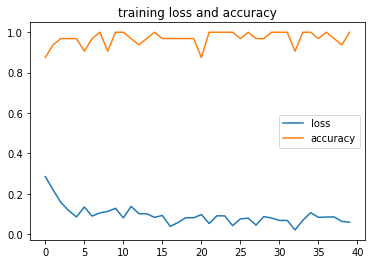

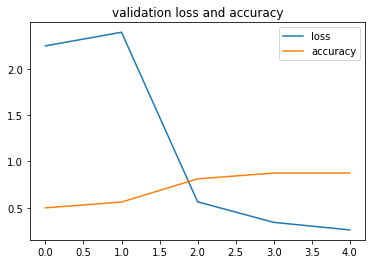

In [30]:
fit(train_dl, val_dl, epochs=5)

[[223  11]
 [ 41 349]]
Pneumonia: precision=0.9694  recall=0.8949  f1: 0.9307
Normal: precision=0.8447  recall=0.953  f1: 0.8956
Accuracy: 91.67%


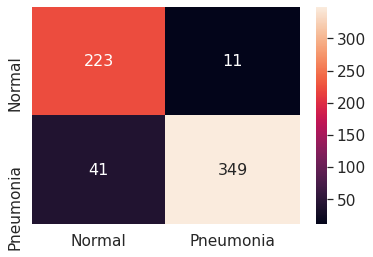

In [31]:
expected, predicted = test_model(model, test_dl)
results = calc_confusion_matrix(expected, predicted)
show_confusion_matrix(results)

[4, 0.001]:

[0.001, 2]:
* [[ 66 168]
 [  0 390]]
* Pneumonia: precision=0.6989  recall=1.0
* f1: 0.8228
* Normal: precision=1.0  recall=0.2821
* Accuracy: 73.08%

[2, 0.01]:
* [[126 108]
 [  0 390]]
* Pneumonia: precision=0.7831  recall=1.0
* f1: 0.8784
* Normal: precision=1.0  recall=0.5385
* Accuracy: 82.69%

[0.99, 0.01]:
* [[180  54]
 [ 16 374]]
* Pneumonia: precision=0.8738 recall=0.959
* f1: 0.9144
* Normal: precision=0.9184 recall=0.7692
* accuracy: 88.8%

[[136  98]
 [  2 388]]
precision=0.7984 recall=0.9949

#### show incorrect results

### Augment data and class weight

In [135]:
# train_ds = xray_Dataset(train_images, data_transform)
train_ds = xray_Dataset(train_set, data_transform)
val_ds = xray_Dataset(val_set, test_data_transform)
test_ds = xray_Dataset(test_images, test_data_transform)

## Dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

In [136]:
model = resnet_model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(f'Weights: {weight}')
criterion = nn.CrossEntropyLoss(weight = weight)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, amsgrad=True)

Weights: tensor([1.9448, 0.6730], device='cuda:0')


[Epoch 1/5] Iteration 20 -> Train Loss: 0.0345, Accuracy: 1.000
[Epoch 1/5] Iteration 40 -> Train Loss: 0.0236, Accuracy: 0.969
[Epoch 1/5] Iteration 60 -> Train Loss: 0.0267, Accuracy: 0.969
[Epoch 1/5] Iteration 80 -> Train Loss: 0.0526, Accuracy: 0.969
[Epoch 1/5] Iteration 100 -> Train Loss: 0.0230, Accuracy: 1.000
[Epoch 1/5] Iteration 120 -> Train Loss: 0.0121, Accuracy: 1.000
[Epoch 1/5] -> Val Loss: 0.0014, Accuracy: 0.973
[Epoch 2/5] Iteration 140 -> Train Loss: 0.0039, Accuracy: 1.000
[Epoch 2/5] Iteration 160 -> Train Loss: 0.0114, Accuracy: 1.000
[Epoch 2/5] Iteration 180 -> Train Loss: 0.0083, Accuracy: 1.000
[Epoch 2/5] Iteration 200 -> Train Loss: 0.0247, Accuracy: 0.969
[Epoch 2/5] Iteration 220 -> Train Loss: 0.0126, Accuracy: 1.000
[Epoch 2/5] Iteration 240 -> Train Loss: 0.0359, Accuracy: 0.938
[Epoch 2/5] Iteration 260 -> Train Loss: 0.0337, Accuracy: 0.969
[Epoch 2/5] -> Val Loss: 0.0031, Accuracy: 0.920
[Epoch 3/5] Iteration 280 -> Train Loss: 0.0126, Accuracy: 1.

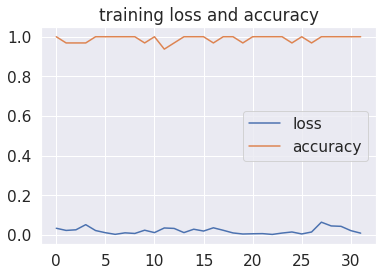

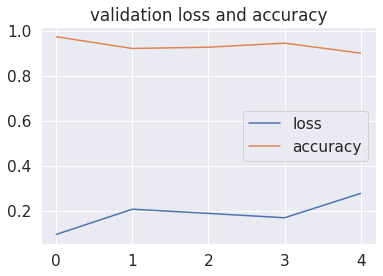

In [137]:
fit(train_dl, val_dl, epochs=5)

[[223  11]
 [ 33 357]]
Pneumonia: precision=0.9701  recall=0.9154  f1: 0.9420
Normal: precision=0.8711  recall=0.953  f1: 0.9102
Accuracy: 92.95%


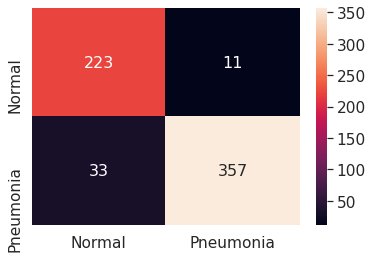

In [138]:
expected, predicted = test_model(model, test_dl)
results = calc_confusion_matrix(expected, predicted)
show_confusion_matrix(results)

* [[223  11]
*  [ 33 357]]
* Pneumonia: precision=0.9701  recall=0.9154  f1: 0.9420
* Normal: precision=0.8711  recall=0.953  f1: 0.9102
* Accuracy: 92.95%

## Oversampling

In [2]:
import torch 
from torch.utils.data.sampler import WeightedRandomSampler

#Let there be 9 samples and 1 sample in class 0 and 1 respectively
class_counts = [9.0, 1.0]
num_samples = sum(class_counts)
labels = [0] *9 + [1] #corresponding labels of samples

class_weights = [num_samples/class_counts[i] for i in range(len(class_counts))]
class_weights
weights = [class_weights[labels[i]] for i in range(int(num_samples))]
sampler = WeightedRandomSampler(torch.DoubleTensor(weights), int(num_samples))
list(sampler)

[5, 9, 0, 9, 9, 3, 9, 9, 7, 9]

In [ ]:
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)

## Problems
 *  image sizes are not the same
 * bug on tranform - resize parameter (224) instead of (224,224) - it resizes only the smaller side of the image

In [45]:
# make sure the new weights are normalized
sum_images = 1341+3875
probs = [1341/sum_images, 3875/sum_images]
weights = [1.9448, 0.6730]
sum([prob*weight for (prob,weight) in zip(probs,weights)])

0.9999715874233129